In [ ]:
Common Characteristics of Top-Grossing Films in the Last Decade

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

In [ ]:
Highest Holywood Grossing Movies.csv

In [18]:
data = pd.read_csv('Highest Holywood Grossing Movies.csv')

In [19]:
print(data.columns)
data = data.rename(columns={
    'Budget (in $)': 'Budget',
    'Domestic Opening (in $)': 'Domestic Opening',
    'Domestic Sales (in $)':'Domestic Sales',
    'International Sales (in $)': 'International Sales',
    'World Wide Sales (in $)':'World Wide Sales'
})



Index(['Unnamed: 0', 'Title', 'Movie Info', 'Year', 'Distributor',
       'Budget (in $)', 'Domestic Opening (in $)', 'Domestic Sales (in $)',
       'International Sales (in $)', 'World Wide Sales (in $)', 'Release Date',
       'Genre', 'Running Time', 'License'],
      dtype='object')


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1000 non-null   int64 
 1   Title                1000 non-null   object
 2   Movie Info           1000 non-null   object
 3   Year                 1000 non-null   int64 
 4   Distributor          999 non-null    object
 5   Budget               1000 non-null   object
 6   Domestic Opening     1000 non-null   object
 7   Domestic Sales       1000 non-null   int64 
 8   International Sales  1000 non-null   int64 
 9   World Wide Sales     1000 non-null   int64 
 10  Release Date         1000 non-null   object
 11  Genre                1000 non-null   object
 12  Running Time         1000 non-null   object
 13  License              943 non-null    object
dtypes: int64(5), object(9)
memory usage: 109.5+ KB


In [21]:
data.head()
data_clean = data.dropna()


In [22]:
unique_numbers = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_numbers.append(x)
    
pd.DataFrame(unique_numbers,index = data.columns,columns=["Total unique_numbers "])
        

,Total unique_numbers
Unnamed: 0,1000
Title,988
Movie Info,999
Year,55
Distributor,71
Budget,361
Domestic Opening,997
Domestic Sales,1000
International Sales,988
World Wide Sales,979


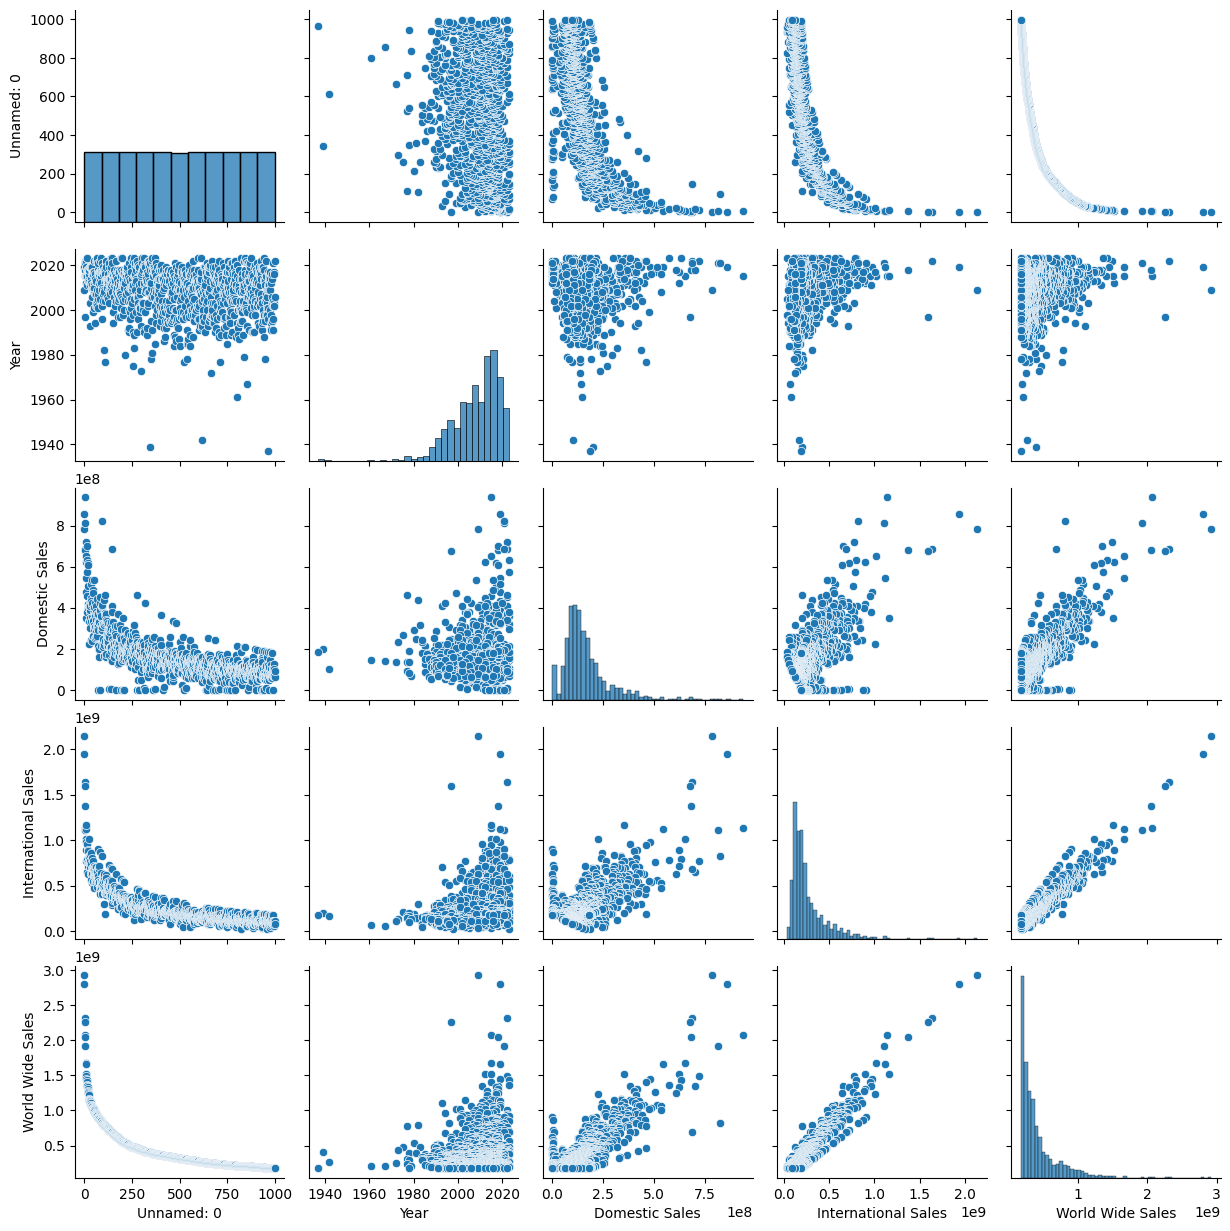

In [23]:
sns.pairplot(data)

In [11]:
data['Genre'] = data['Genre'].apply(ast.literal_eval)

data_exploded = data.explode('Genre')

Genre_by_sale = data_exploded.groupby('Genre')['World Wide Sales'].sum().reset_index()

In [6]:
Genre_by_sale.head()

,Genre,World Wide Sales
0,Action,236388989371
1,Adventure,265825606053
2,Animation,70102160482
3,Biography,12957272845
4,Comedy,145140630843


<Figure size 1400x800 with 0 Axes>

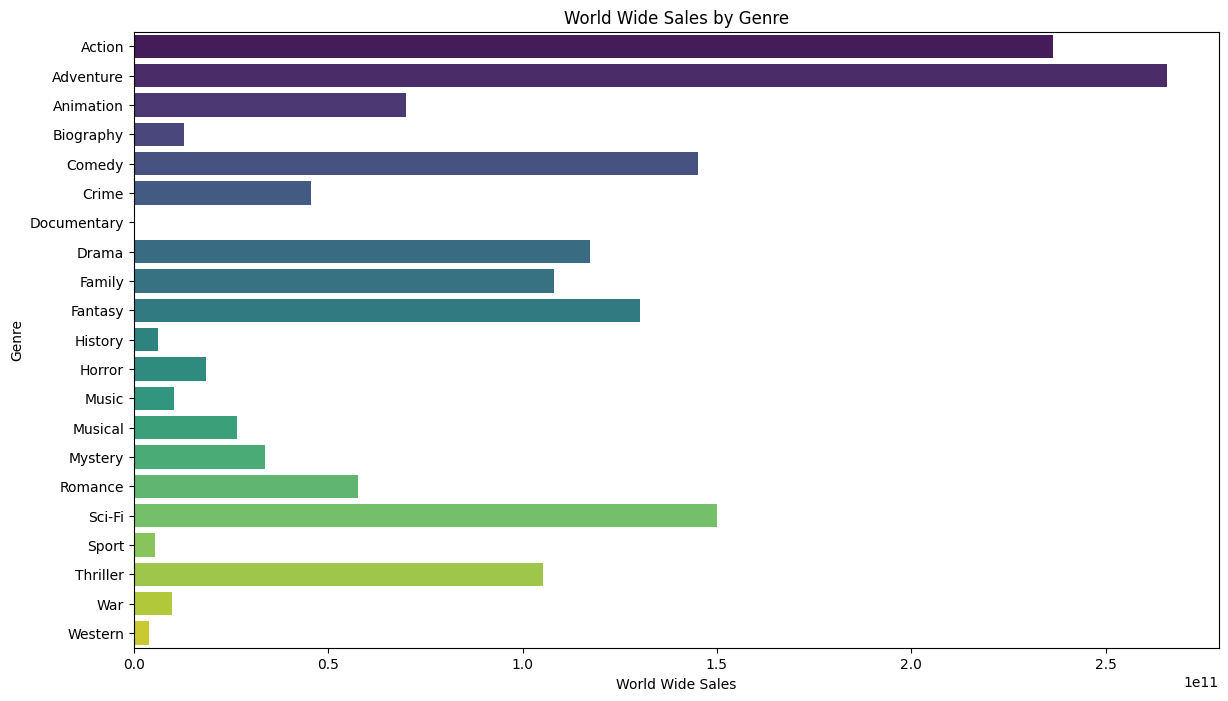

In [12]:
plt.figure(figsize=(14, 8))

plt.figure(figsize=(14, 8))

sns.barplot(x='World Wide Sales', y='Genre', data=Genre_by_sale, hue='Genre', dodge=False, palette='viridis')

plt.xlabel('World Wide Sales')
plt.ylabel('Genre')
plt.title('World Wide Sales by Genre')
plt.legend([],[], frameon=False)  
plt.show()

In [13]:
data['Decade'] = data['Year'].apply(lambda x: (x // 10) * 10)
data.head()

,Unnamed: 0,Title,Movie Info,Year,Distributor,Budget,Domestic Opening,Domestic Sales,International Sales,World Wide Sales,Release Date,Genre,Running Time,License,Decade
0,0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000.0,77025481,785221649,2138484377,2923706026,16-Dec-09,"[Action, Adventure, Fantasy, Sci-Fi]",2 hr 42 min,PG-13,2000
1,1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000.0,357115007,858373000,1941066100,2799439100,24-Apr-19,"[Action, Adventure, Drama, Sci-Fi]",3 hr 1 min,PG-13,2010
2,2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,NaN,134100226,684075767,1636174514,2320250281,24-Apr-19,"[Action, Adventure, Drama, Sci-Fi]",3 hr 1 min,PG-13,2020
3,3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000.0,28638131,674292608,1590450697,2264743305,19-Dec-97,"[Drama, Romance]",3 hr 14 min,PG-13,1990
4,4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000.0,247966675,936662225,1134647993,2071310218,16-Dec-15,"[Action, Adventure, Sci-Fi]",2 hr 18 min,PG-13,2010


In [14]:
import pandas as pd
import ast

# فرض کنید داده‌های شما در دیتافریم data قرار دارند

# 1. تبدیل رشته‌های ژانر به لیست‌های واقعی
data['Genre'] = data['Genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# 2. ایجاد ستون دهه
data['Decade'] = data['Year'].apply(lambda x: (x // 10) * 10)

# 3. انفجار (تکرار) ردیف‌ها بر اساس هر ژانر
data_exploded = data.explode('Genre')

# 4. گروه‌بندی بر اساس ژانر و دهه، و محاسبه مجموع فروش جهانی
Genre_by_decade_sale = data_exploded.groupby(['Genre', 'Decade'])['World Wide Sales'].sum().reset_index()

# نمایش نتیجه


In [41]:
Genre_by_decade_sale

,Genre,Decade,World Wide Sales
0,Action,1940,267447150
1,Action,1960,215880014
2,Action,1970,1830186853
3,Action,1980,5885207212
4,Action,1990,22003154729
...,...,...,...
122,War,2020,1098102901
123,Western,1990,1141679635
124,Western,2000,211787511
125,Western,2010,1717528521


In [15]:
top_genre_per_decade = Genre_by_decade_sale.loc[Genre_by_decade_sale.groupby('Decade')['World Wide Sales'].idxmax()]
top_genre_per_decade

,Genre,Decade,World Wide Sales
8,Adventure,1930,402382193
0,Action,1940,267447150
1,Action,1960,215880014
9,Adventure,1970,2047161642
10,Adventure,1980,6563151935
4,Action,1990,22003154729
12,Adventure,2000,64404214401
13,Adventure,2010,146969002035
7,Action,2020,25434161234


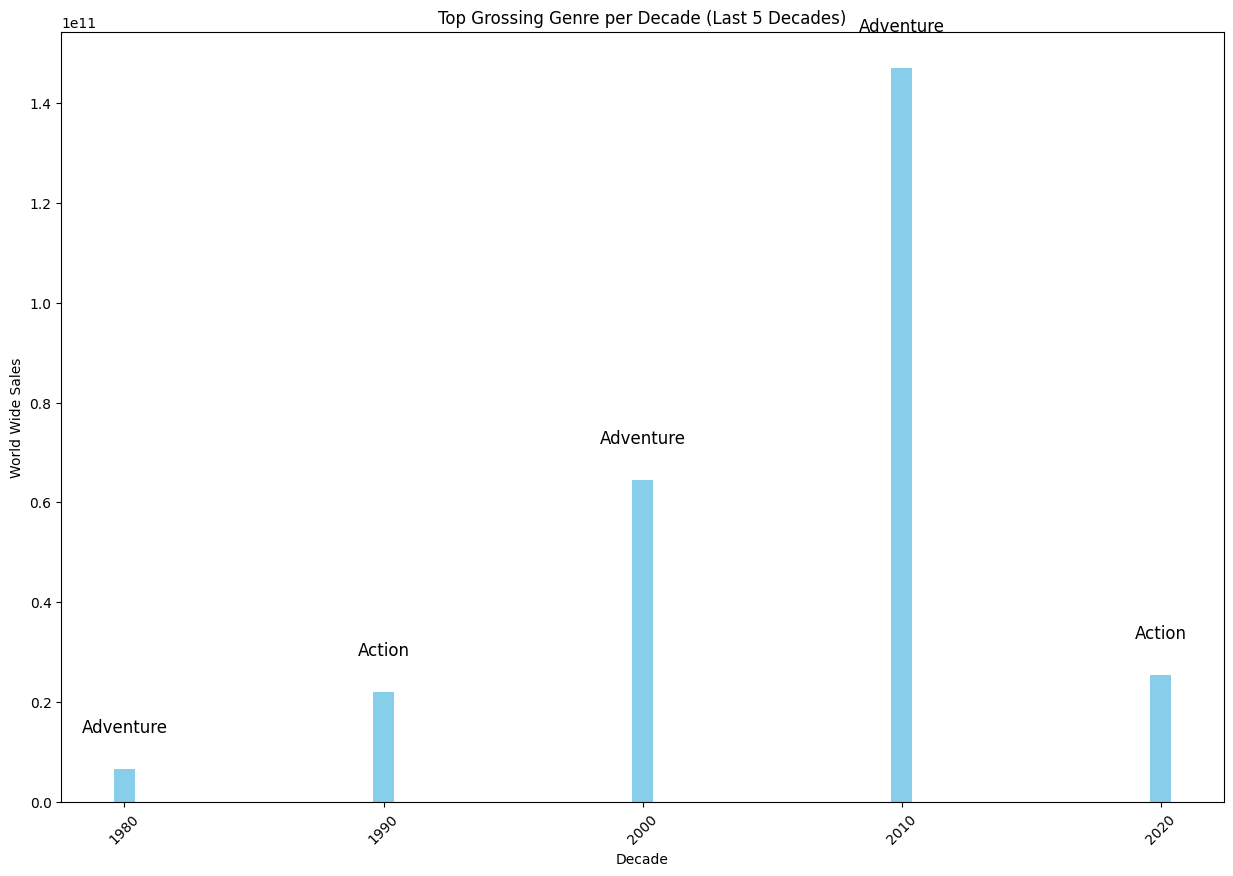

In [11]:
# فیلتر کردن داده‌ها برای نمایش فقط 5 دهه گذشته
filtered_data = top_genre_per_decade[top_genre_per_decade['Decade'] >= 1980]

# ایجاد نمودار ستونی برای نشان دادن ژانر پرطرفدار در 5 دهه گذشته
plt.figure(figsize=(15, 10))
plt.bar(filtered_data['Decade'], filtered_data['World Wide Sales'], color='skyblue')

# اضافه کردن لیبل ژانرها روی نمودار
for index, row in filtered_data.iterrows():
    plt.text(row['Decade'], 
             row['World Wide Sales'] + 0.05 * filtered_data['World Wide Sales'].max(), 
             row['Genre'], ha='center', fontsize=12)

plt.xlabel('Decade')
plt.ylabel('World Wide Sales')
plt.title('Top Grossing Genre per Decade (Last 5 Decades)')
plt.xticks(filtered_data['Decade'], rotation=45)
plt.show()

